# Machine Learning Capstone Project (OKCupid-Date-A-Scientist)

# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

In this capstone project, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Import Python Modules

First we import the modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time 
import re
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

## Loading the Data

Now we load the csv into a DataFrame:

In [3]:
df = pd.read_csv("profiles.csv")

df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [29]:
df.shape

(59946, 31)

This dataset has 59946 rows and 31 columns.

The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

## Explore and Explain Data

Now I take a look at some columns and build graphs from the data to get better understanding about our dataset.First of all, I want to know the distribution of ages, height and income of OKCupid's users.

In [7]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### Age Distribution

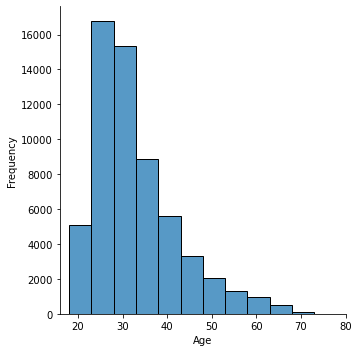

In [8]:
sns.displot(data=df, x="age", binwidth = 5);

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

We can see that most of the users are between 25 to 35 years old.We can also plot the age histogram by splitting the users by gender.

(16.0, 80.0)

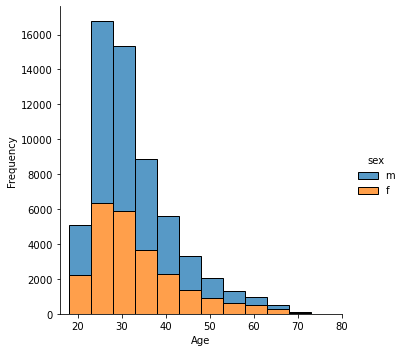

In [24]:
sns.displot(data=df, x="age", hue="sex", binwidth = 5, multiple = "stack");

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)

According to the histogram, the distribution for both genders are the same, but there are more male users than female users.

#### Height Distribution

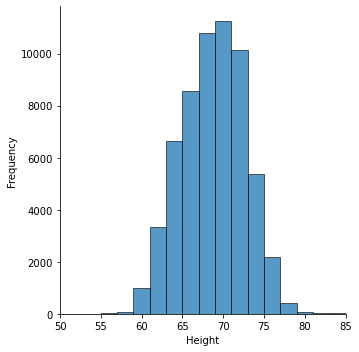

In [8]:
sns.displot(data=df, x="height", binwidth = 2);

plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(50, 85)
plt.show()

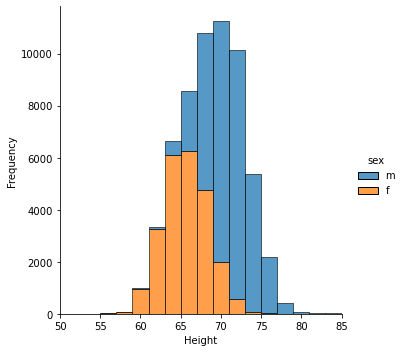

In [39]:
sns.displot(data=df, x="height", binwidth = 2, hue= 'sex', multiple= 'stack');

plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(50, 85)
plt.show()

The heights of users has a normal distribution.Heights of most of the users are between 60 and 80.Males are taller than females.

#### Income Distribution

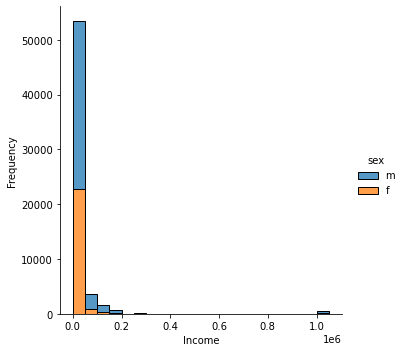

In [18]:
sns.displot(data=df, x="income",hue="sex", binwidth = 50000, multiple = "stack");

plt.xlabel("Income")
plt.ylabel("Frequency")
#plt.xlim(0, 200000)
plt.show()

Most of users have an income under 200000.Male users have higher income than females

### Categorical Variables

#### Gender

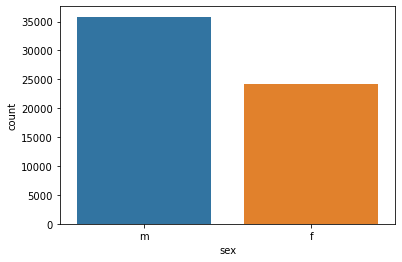

In [24]:
sns.countplot(data=df, x="sex");

Male users are more than female users.

#### Body Type

In [9]:
df.body_type.value_counts(dropna=False)

average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

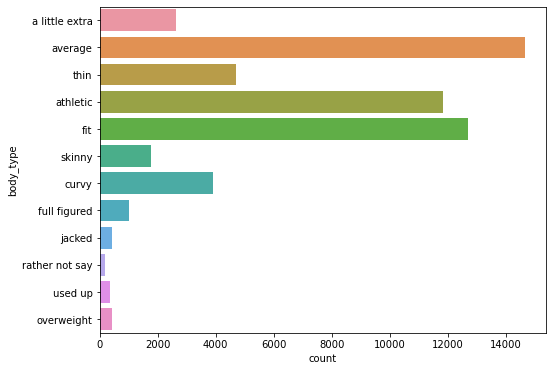

In [36]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="body_type");


Most of the users declared their body type as average, fit, or athletic.

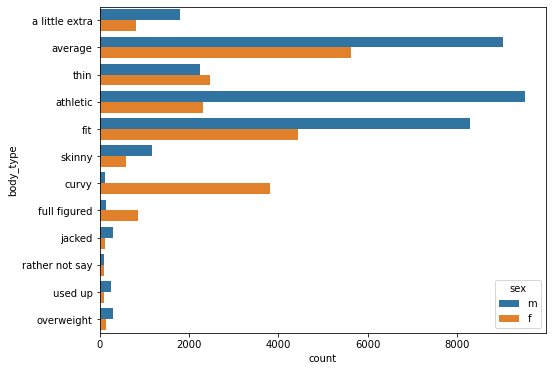

In [37]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="body_type", hue = 'sex');

When we split countplot of body type variable by gender, we can see that most of the females described their body types with following three categories: average, fit or curvy but males described their body types with athletic, average or fit.It seems that curvy and full figured are feminine descriptions and overweight and jacked used mostly by male users.

#### Diet

According to the countplot below, most of the users eat mostly anything, followed by 'anything', 'strongly anything'.The fourth popular diet is 'mostly vegeterian'.

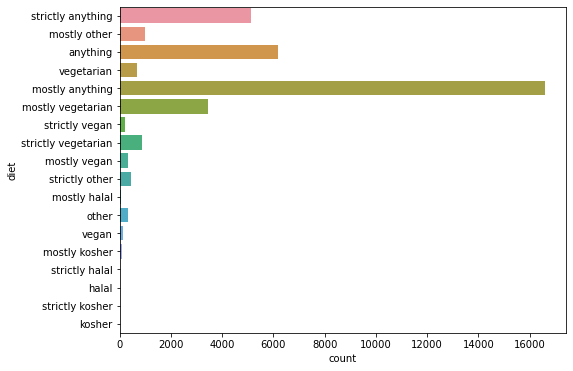

In [6]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="diet");

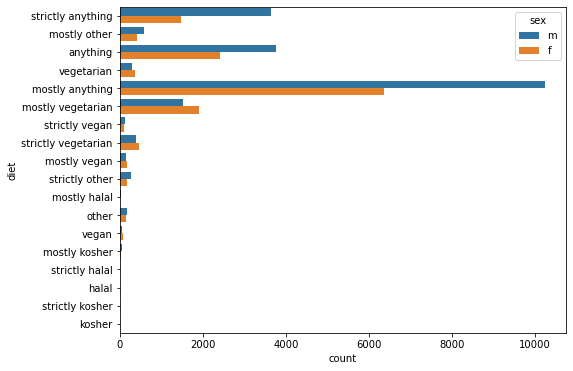

In [7]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="diet", hue = 'sex');

When we split the diet data with gender, women are more likely to be vegetarian.

#### Drinks

According to the plot, the majority of the users drink "socially".

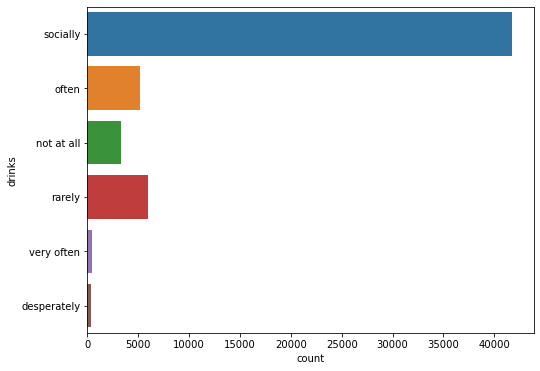

In [8]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="drinks");

#### Drugs

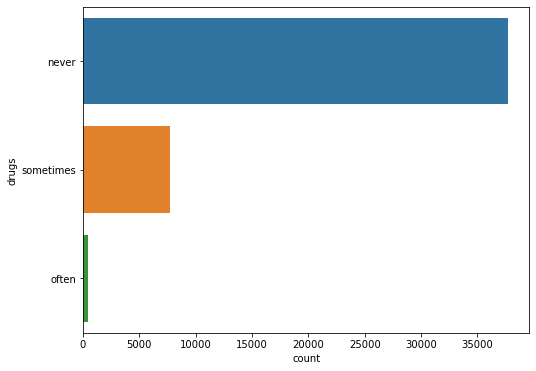

In [10]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="drugs");

we can see that overwhelming majority of the users never use drugs.

#### Education

According to the chart below, we can see that the majority of users graduated from college/university followed by masters graduates and people who 'working on college/university'.

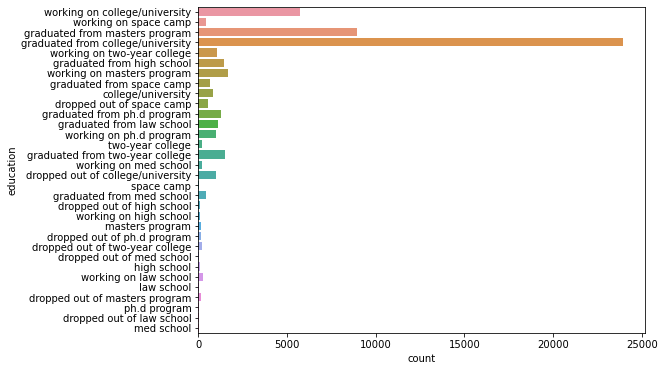

In [12]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="education");

#### Job

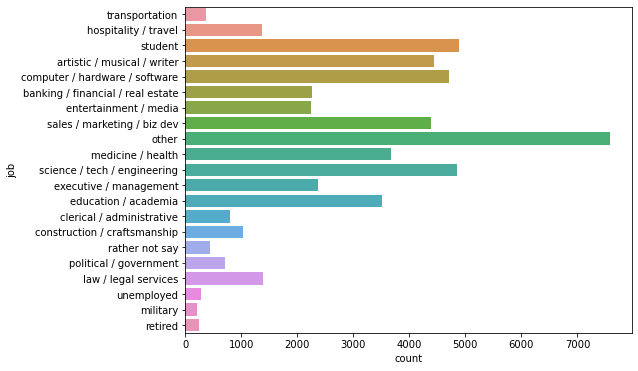

In [17]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="job");


As we can see on the graph, most of users declared their job as 'other'.By calling 'value_counts' function on job column we can see exact number of each job that were declared by users.Students, technicians, computer specialists, artists and those who works in business make up the majority of OKCupid users with roughly the equal percentage of users. 

In [23]:
df.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

#### Offspring
The chart below shows that most of the users do not have kids.

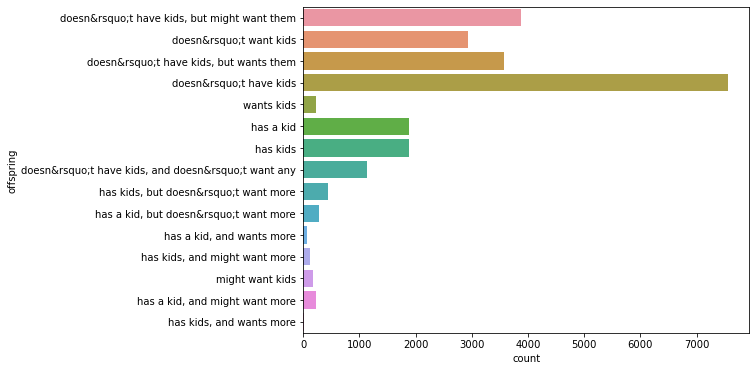

In [25]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="offspring");


#### Orientation

According to the chart below, as far as sexual orientation is concerned, the majority of the users are straight.

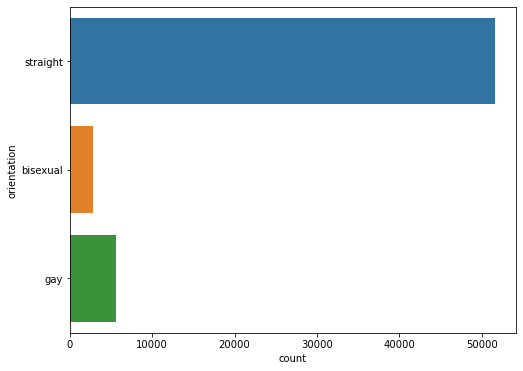

In [10]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="orientation");


#### pets

As we can see in the graph, most users like both dogs and cats.

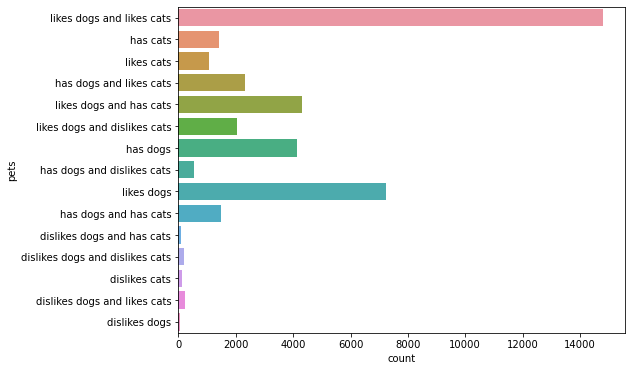

In [12]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="pets");


#### Religion

By looking at the countplot of users' religion and calling value_counts function on this column, we find out that we can reduce the number of categories.

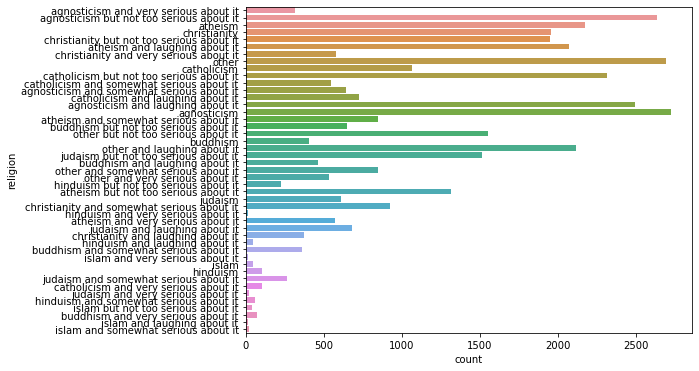

In [30]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="religion");


In [24]:
df.religion.value_counts(dropna=False)

NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
judaism and 

In [9]:
df['religion_cleaned'] = df['religion'].str.split().str[0]

print(df['religion_cleaned'].head())

0    agnosticism
1    agnosticism
2            NaN
3            NaN
4            NaN
Name: religion_cleaned, dtype: object


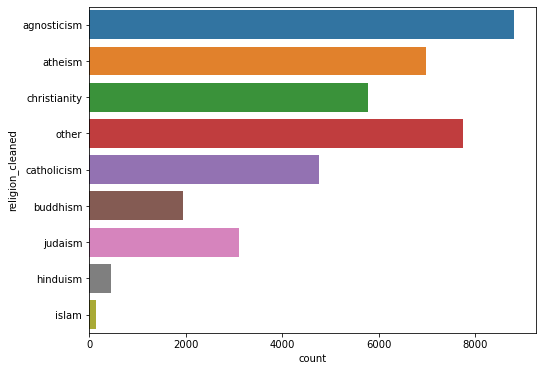

In [6]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="religion_cleaned");


The plot shows that most of the users are not religious.The majority of OKCupid's users are agnostic or atheist or did not mention their belief(other).Between religious users, most of them are christian.

#### sign

Like the religion column we need to clean the sign column.We have twelve astrological signs, so we have to clean sign column and reduce the number of categories into twelve.

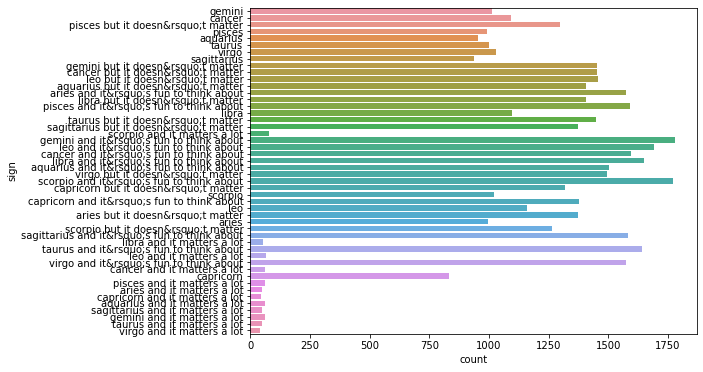

In [77]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="sign");


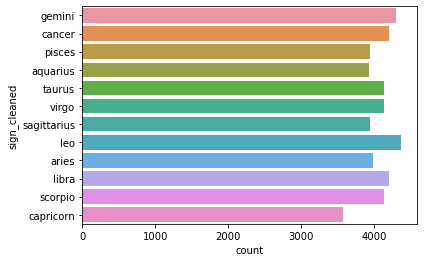

In [10]:
df['sign_cleaned'] = df['sign'].str.split().str[0]

sns.countplot(data=df, y="sign_cleaned");


Astrological sign of the most of users is Leo and least common astrological sign of the users is Capricorn.

#### Smokes

As we can see in the graph below, the vast majority of users do not smoke.

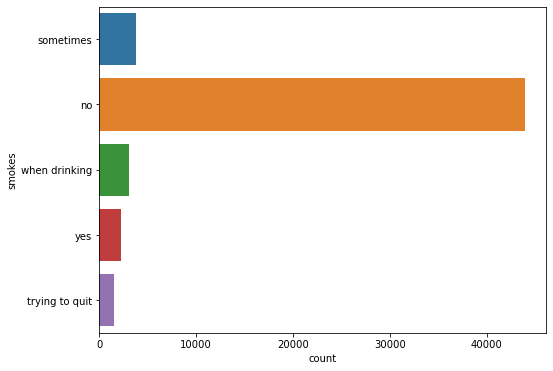

In [80]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="smokes");


#### Status

The vast majority of uses are single.This is reasonable.Because they registered in this dating app to find a partner.

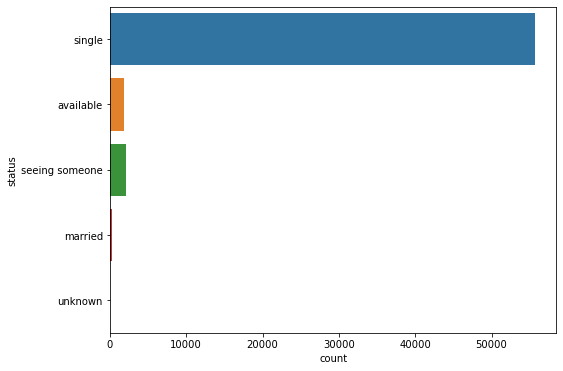

In [83]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="status");


### Data Preperation

#### Missing Value

Here we take a look at missing values in each column. We can see that lots of columns have many null values.

In [5]:
print(df.isnull().sum())

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
religion_cleaned    20226
sign_cleaned        11056
dtype: int64


#### Convert Categorical Variables into Numeric Form

Most of machine learning algorithms require all data to be numerical.Before deploying any machine learning algorithm to our data, we have to convert categorical features into numeric values.Some features like "drinks", "drug" and "smoke" have a degree range and can be considered as ordinal variable. These features can be mapped to numeric values.

I create dummy variables for 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'status' and 'education' whenever I use them for my analysis.Because they do not have a clear order.

In [50]:
drinks_codes = {
    "not at all": 0,
    "rarely": 1,
    "socially": 2,
    "often": 3,
    "very often": 4,
    "desperately": 5
}

drugs_codes = {
    "never": 0,
    "sometimes": 1,
    "often": 2
}

smokes_codes = {
    "no": 0,
    "when drinking": 1,
    "sometimes": 2,
    "yes": 3,
    "trying to quit": 3
}

"""
body_type_codes = {'thin':0,
                   'skinny':1,
                   'fit':2,
                   'athletic':3,
                   'jacked':4,
                   'rather not say':5,
                   'average':6,
                   'a little extra':7,
                   'used up':8,
                   'curvy':9,
                   'overweight':10,
                   'full figured':11}

df_copy["body_type_code"] = df_copy['body_type'].map(body_type_codes)

"""

def catVartoNumeric(dataframe):
    #convert drinks column to numeric value
    dataframe["drinks_code"] = dataframe['drinks'].map(drinks_codes)

    #convert drugs column to numeric value

    dataframe["drugs_code"] = dataframe['drugs'].map(drugs_codes)

    #convert smokes ordinal categorical values into numeric value

    dataframe["smokes_code"] = dataframe['smokes'].map(smokes_codes)
    
    return
    

### Question 1: Can we predict Zodiac signs using 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' and 'drugs_code' features?

We don't need all columns for our machine learning part.So we have to choose subset of features and then remove the rows which have a null values in those columns.

In [12]:
#create copy of dataframe to do the changes only to a copy of data
df_copy = df

#convert 'smokes', 'drinks' and 'drugs' to numeric form

catVartoNumeric(df_copy)

selected_features = ['sign_cleaned', 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' , 'drugs_code']
df_copy = df_copy[selected_features].dropna()

#convert 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job' into dummy variables

categoricalCols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job']

for col in categoricalCols:
    df_copy = pd.get_dummies(df_copy, columns=[col], prefix = [col])

print(df_copy.shape)

(12927, 84)


In [9]:
#let's take a look at new dataframe
df_copy.head(10)

#print(df_copy.columns)

,sign_cleaned,smokes_code,drinks_code,drugs_code,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,2.0,2.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0.0,3.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0.0,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,leo,0.0,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,taurus,0.0,2.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18,libra,0.0,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,pisces,0.0,2.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20,libra,0.0,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22,sagittarius,0.0,2.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting Data

Before applying the machine learning methods, we have to split our data into training set and test set. I have to use normalization in order to give equal weights/importance to each feature so that no single feature steers model performance in one direction just because it has larger value.By using MinMaxScaler I change the values of numeric feature of the dataset to a common scale.

In [13]:

#Y is the target column, X has the features
X = df_copy.iloc[:, 1:]
y = df_copy['sign_cleaned']

#Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#use MinMaxScaler to put all features values in the same range and scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Model Building

In this step, we have choose some classification methods from scikit-learn library to predict class of test set samples.Classification methods should be able to do a multiclass classification. I used Multinomial Naive Bayes, LogisticRegression, DecisionTreeClassifiers and KNeighborsClassifier.

#### Multinomial Naive Bayes

In [12]:
NBmodel = MultinomialNB()
#NBmodel = GaussianNB()

NBmodel.fit(X_train_scaled, y_train)

training_accuracy = NBmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = NBmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 13.0%

              precision    recall  f1-score   support

    aquarius       0.06      0.03      0.04       178
       aries       0.08      0.08      0.08       212
      cancer       0.11      0.13      0.12       246
   capricorn       0.06      0.04      0.05       168
      gemini       0.10      0.09      0.09       231
         leo       0.09      0.09      0.09       254
       libra       0.09      0.13      0.11       199
      pisces       0.06      0.09      0.07       181
 sagittarius       0.09      0.05      0.06       224
     scorpio       0.05      0.03      0.03       228
      taurus       0.06      0.04      0.05       234
       virgo       0.09      0.17      0.12       231

    accuracy                           0.08      2586
   macro avg       0.08      0.08      0.08      2586
weighted avg       0.08      0.08      0.08      2586



#### Logistic Regression

In [14]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 13.0%

              precision    recall  f1-score   support

    aquarius       0.05      0.03      0.04       178
       aries       0.08      0.08      0.08       212
      cancer       0.11      0.13      0.12       246
   capricorn       0.05      0.04      0.04       168
      gemini       0.12      0.14      0.13       231
         leo       0.09      0.10      0.09       254
       libra       0.09      0.12      0.10       199
      pisces       0.06      0.09      0.07       181
 sagittarius       0.06      0.04      0.05       224
     scorpio       0.08      0.04      0.05       228
      taurus       0.07      0.05      0.06       234
       virgo       0.09      0.14      0.11       231

    accuracy                           0.09      2586
   macro avg       0.08      0.08      0.08      2586
weighted avg       0.08      0.09      0.08      2586



We can see that by using naive bayes classifier and logistic regression, we get poor results.The accuracy of both models are very low(9%).They are even perform very poorly on the training data too.The accuracy of model on training data is 13%. This shows us that these two classification methods are not suitable and we have underfitting problem.

#### K Nearest Neighbor

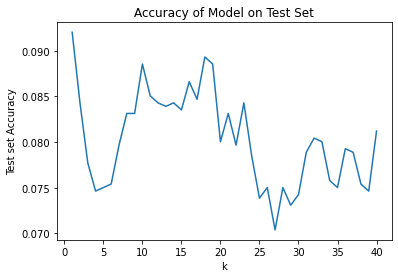

In [14]:
accuracies = []
k_list = list(range(1,41))

for k in range(1,41):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    accuracies.append(KNNmodel.score(X_test_scaled, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

In [15]:
KNNmodel = KNeighborsClassifier(n_neighbors = 10)

KNNmodel.fit(X_train_scaled, y_train)

training_accuracy = KNNmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = KNNmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 26.0%

              precision    recall  f1-score   support

    aquarius       0.07      0.12      0.09       178
       aries       0.10      0.16      0.12       212
      cancer       0.11      0.15      0.13       246
   capricorn       0.06      0.07      0.06       168
      gemini       0.11      0.13      0.12       231
         leo       0.12      0.10      0.11       254
       libra       0.08      0.08      0.08       199
      pisces       0.08      0.10      0.09       181
 sagittarius       0.04      0.03      0.03       224
     scorpio       0.06      0.03      0.04       228
      taurus       0.08      0.04      0.06       234
       virgo       0.11      0.06      0.07       231

    accuracy                           0.09      2586
   macro avg       0.09      0.09      0.08      2586
weighted avg       0.09      0.09      0.08      2586



By using K Nearest Neighbor algorithm and choose k to be 10, we get better training accuracy than previous two methods but this is still low(26%).Our accuracy on test set is 9% which is very low.

#### Decision Tree Classifier

In [16]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 91.0%

              precision    recall  f1-score   support

    aquarius       0.05      0.06      0.06       178
       aries       0.07      0.09      0.08       212
      cancer       0.09      0.09      0.09       246
   capricorn       0.07      0.09      0.08       168
      gemini       0.09      0.10      0.09       231
         leo       0.10      0.08      0.09       254
       libra       0.08      0.09      0.09       199
      pisces       0.07      0.09      0.08       181
 sagittarius       0.06      0.06      0.06       224
     scorpio       0.06      0.04      0.05       228
      taurus       0.08      0.06      0.07       234
       virgo       0.07      0.06      0.06       231

    accuracy                           0.08      2586
   macro avg       0.07      0.08      0.07      2586
weighted avg       0.08      0.08      0.07      2586



The accuracy of decision tree model on training data is 91% which is very high but on test data it performs very bad by 8% accuracy.This shows that decision tree model suffers from overfitting.If we guess the zodiac sign of user, the probability of guessing correct is 1/12 (0.083).This tell us that our models that I trained above did not significantly outperform random guessing.

So we can conclude that by using 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' and 'drugs_code', we cannot predict zodiac sign of the user.

### Question 2: Can we use lifestyle information ('diet', 'smokes_code', 'drinks_code', 'drugs_code'), sex and age to predict body type?

In [24]:
#create copy of dataframe to do the changes only to a copy of data
df_copy2 = df

#convert 'smokes', 'drinks' and 'drugs' to numeric form

catVartoNumeric(df_copy2)

selected_features = ['body_type', 'diet', 'sex', 'smokes_code', 'drinks_code' , 'drugs_code', 'age']
df_copy2 = df_copy2[selected_features].dropna()

#convert 'diet' and 'sex' into dummy variables
categoricalCols = ['diet', 'sex']

for col in categoricalCols:
    df_copy2 = pd.get_dummies(df_copy2, columns=[col], prefix = [col])

print(df_copy2.shape)

(25202, 25)


In [27]:
#Y is the target column, X has the features
X = df_copy2.iloc[:, 1:]
y = df_copy2['body_type']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

After splitting data into training set and test set and normalizing it, our data is ready for analysis.For this question I used 4 different classifiers.Logistic Regression, K Nearest Neighbor, Decision Tree and Support Vector Machine.

#### Logistic Regression

Logistic Regression do a binary classification.In order to do a multi class classification, I give "multinomial" argument to the  multi_class parameter.The accuracy of this model on training data is 28.99% and accuracy of model on test data is 29%.

In [35]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 28.999999999999996%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00       265
      athletic       0.30      0.54      0.38      1028
       average       0.29      0.50      0.37      1399
         curvy       0.22      0.11      0.15       357
           fit       0.28      0.14      0.19      1159
  full figured       0.00      0.00      0.00        95
        jacked       0.00      0.00      0.00        34
    overweight       0.00      0.00      0.00        46
rather not say       0.00      0.00      0.00        12
        skinny       1.00      0.01      0.01       166
          thin       0.07      0.00      0.00       438
       used up       0.00      0.00      0.00        42

      accuracy                           0.29      5041
     macro avg       0.18      0.11      0.09      5041
  weighted avg       0.26      0.29      0.23      5041



#### K Nearest Neighbor

For finding the best k for our model, I run the KNN algorithm for 90 times and find the k that gives the best accuracy score.This k is 67 for our data. The accuracy of KNN model(K=67) on training data is 31% and accuracy of model on test data is 28%.

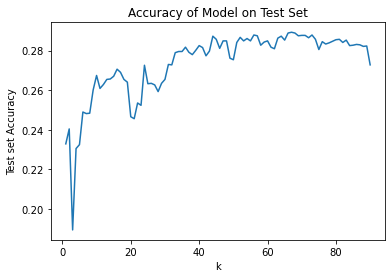

Best K for best accuracy is: 67


In [26]:
accuracies = []
k_list = list(range(1,91))

for k in range(1,91):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    accuracies.append(KNNmodel.score(X_test_scaled, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")


In [32]:
KNNmodel = KNeighborsClassifier(n_neighbors = 67)

KNNmodel.fit(X_train_scaled, y_train)

training_accuracy = KNNmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = KNNmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 31.0%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00       265
      athletic       0.30      0.41      0.35      1028
       average       0.29      0.50      0.37      1399
         curvy       0.16      0.09      0.12       357
           fit       0.26      0.23      0.25      1159
  full figured       0.00      0.00      0.00        95
        jacked       0.00      0.00      0.00        34
    overweight       0.00      0.00      0.00        46
rather not say       0.00      0.00      0.00        12
        skinny       0.00      0.00      0.00       166
          thin       0.18      0.00      0.01       438
       used up       0.00      0.00      0.00        42

      accuracy                           0.28      5041
     macro avg       0.10      0.10      0.09      5041
  weighted avg       0.23      0.28      0.24      5041



#### Decision Tree Classifier

When using a Decision Tree classifier in python we can tune its hyperparameters to get the best result.We can find the best parameters that give best score.By using grid search technique, we can achieve this.I used 'criterion', 'max_depth', 'min_samples_leaf' for tuning.The accuracy of Decision Tree on training data is 32% and accuracy of model on test data is 29%.

In [33]:
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2}
Best score is 0.2856506244120923


In [34]:
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  8, min_samples_leaf = 2)

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

print(DTmodel.get_depth())

The accuracy of model on training data is: 32.0%

                precision    recall  f1-score   support

a little extra       0.10      0.00      0.01       265
      athletic       0.30      0.38      0.33      1028
       average       0.29      0.52      0.37      1399
         curvy       0.22      0.14      0.17       357
           fit       0.29      0.24      0.26      1159
  full figured       0.00      0.00      0.00        95
        jacked       0.00      0.00      0.00        34
    overweight       0.00      0.00      0.00        46
rather not say       0.00      0.00      0.00        12
        skinny       0.00      0.00      0.00       166
          thin       0.10      0.01      0.02       438
       used up       0.00      0.00      0.00        42

      accuracy                           0.29      5041
     macro avg       0.11      0.11      0.10      5041
  weighted avg       0.24      0.29      0.24      5041

8


#### Support Vector Machine

We can tune hyperparameters for SVM model too. I choose 'C', 'gamma', 'kernel' for tuning.The accuracy of tuned Support Vector Machine on training data is 30% and accuracy of model on test data is 29%.

In [9]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

SVCmodel = SVC()

svm_cv = GridSearchCV(SVCmodel, param_grid, cv = 5)

svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Support Vector Machine classifier Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Tuned Support Vector Machine classifier Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best score is 0.29834871732807516


In [36]:
SVCmodel = SVC(kernel = 'rbf', C = 0.1, gamma = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 30.0%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00       265
      athletic       0.29      0.59      0.39      1028
       average       0.28      0.51      0.36      1399
         curvy       0.00      0.00      0.00       357
           fit       0.28      0.11      0.16      1159
  full figured       0.00      0.00      0.00        95
        jacked       0.00      0.00      0.00        34
    overweight       0.00      0.00      0.00        46
rather not say       0.00      0.00      0.00        12
        skinny       0.00      0.00      0.00       166
          thin       0.00      0.00      0.00       438
       used up       0.00      0.00      0.00        42

      accuracy                           0.29      5041
     macro avg       0.07      0.10      0.08      5041
  weighted avg       0.20      0.29      0.22      5041



We can see that all of four models have approximately the same accuracy.Their accuracy on both training set and test set is about 30%. This accuracy is under 50% and tells us that 'diet', 'smokes_code', 'drinks_code', 'drugs_code', sex and age cannot be used to predict body type.

### Question 3: Can we predict income of users using "job", "sex" and "education"?

First of all we have to inspect income column and see what values were entered by users. We can see that majority of users did not give informtion about their income(-1). We should replace (-1) with nan values and then drop those rows with other rows that have a null values in them.

In this part of project, I do not use normalization or standardization, because after converting 'job', 'sex' and 'education' into dummy variables and using one hot encoding method, all the features' data mapped to ones and zeros and all the features have the same scale. So we do not need to scale them.

In [11]:
#create copy of dataframe to do the changes only to a copy of data
df_copy3 = df

df_copy3[df_copy3.income==-1]= np.nan

df_copy3.income.value_counts(dropna = False)

NaN          48442
20000.0       2952
100000.0      1621
80000.0       1111
30000.0       1048
40000.0       1005
50000.0        975
60000.0        736
70000.0        707
150000.0       631
1000000.0      521
250000.0       149
500000.0        48
Name: income, dtype: int64

In [12]:
selected_features = ['income', 'job', 'sex', 'education']
df_copy3 = df_copy3[selected_features].dropna()

#convert 'job', 'sex' and 'education' into dummy variables
categoricalCols = ['job', 'sex', 'education']

for col in categoricalCols:
    df_copy3 = pd.get_dummies(df_copy3, columns=[col], prefix = [col], drop_first =True)

print(df_copy3.shape)

df_copy3.head()

(10536, 52)


,income,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
1,80000.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,20000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,40000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,30000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
#Y is the target column, X has the features
X = df_copy3.iloc[:, 1:]
y = df_copy3['income']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train) 
#X_test_scaled = scaler.fit_transform(X_test)

#### K Nearest Neighbor

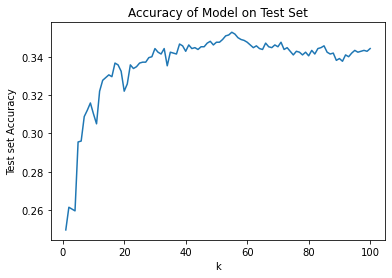

Best K for best accuracy is: 55


In [32]:
accuracies = []
k_list = list(range(1,101))

for k in range(1,101):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train, y_train)
    accuracies.append(KNNmodel.score(X_test, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")

In [14]:
KNNmodel = KNeighborsClassifier(n_neighbors = 55).fit(X_train, y_train)
KNN_predictions = KNNmodel.predict(X_test)

In [17]:
training_accuracy = KNNmodel.score(X_train, y_train)

print(classification_report(y_test, KNN_predictions))

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))


              precision    recall  f1-score   support

     20000.0       0.44      0.92      0.59       537
     30000.0       0.12      0.01      0.02       177
     40000.0       0.14      0.02      0.03       186
     50000.0       0.16      0.10      0.12       171
     60000.0       0.00      0.00      0.00       122
     70000.0       0.17      0.02      0.04       147
     80000.0       0.17      0.04      0.06       208
    100000.0       0.30      0.58      0.40       302
    150000.0       0.17      0.18      0.17       131
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        11
   1000000.0       0.18      0.02      0.04        93

    accuracy                           0.35      2108
   macro avg       0.15      0.16      0.12      2108
weighted avg       0.24      0.35      0.24      2108

The accuracy of model on training data is: 37.0%


#### Decision Tree Classifier

In [16]:
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 3}
Best score is 0.3580931462101932


In [18]:
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  18, min_samples_leaf = 3)

DTmodel.fit(X_train, y_train)

training_accuracy = DTmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 39.0%

              precision    recall  f1-score   support

     20000.0       0.43      0.89      0.58       537
     30000.0       0.09      0.02      0.03       177
     40000.0       0.17      0.05      0.08       186
     50000.0       0.17      0.10      0.12       171
     60000.0       0.00      0.00      0.00       122
     70000.0       0.22      0.01      0.03       147
     80000.0       0.20      0.03      0.06       208
    100000.0       0.30      0.63      0.41       302
    150000.0       0.23      0.12      0.16       131
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        11
   1000000.0       0.13      0.02      0.04        93

    accuracy                           0.34      2108
   macro avg       0.16      0.16      0.12      2108
weighted avg       0.24      0.34      0.24      2108



In [19]:
SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train, y_train)

training_accuracy = SVCmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 37.0%

              precision    recall  f1-score   support

     20000.0       0.48      0.88      0.62       537
     30000.0       0.11      0.01      0.01       177
     40000.0       0.14      0.03      0.05       186
     50000.0       0.16      0.12      0.13       171
     60000.0       0.10      0.02      0.03       122
     70000.0       0.13      0.01      0.02       147
     80000.0       0.20      0.08      0.11       208
    100000.0       0.29      0.77      0.42       302
    150000.0       0.25      0.02      0.03       131
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        11
   1000000.0       0.08      0.02      0.03        93

    accuracy                           0.36      2108
   macro avg       0.16      0.16      0.12      2108
weighted avg       0.25      0.36      0.25      2108



#### Logistic Regression

In [20]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train, y_train)

training_accuracy = logReg_model.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 37.0%

              precision    recall  f1-score   support

     20000.0       0.47      0.88      0.61       537
     30000.0       0.14      0.03      0.05       177
     40000.0       0.10      0.01      0.02       186
     50000.0       0.19      0.10      0.13       171
     60000.0       0.00      0.00      0.00       122
     70000.0       0.09      0.01      0.01       147
     80000.0       0.17      0.07      0.10       208
    100000.0       0.29      0.73      0.41       302
    150000.0       0.21      0.10      0.14       131
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        11
   1000000.0       0.24      0.04      0.07        93

    accuracy                           0.36      2108
   macro avg       0.16      0.16      0.13      2108
weighted avg       0.24      0.36      0.25      2108



We can see that Logistic Regression and svc models have the best accuracy by 36% on test set, KNN has 35% accuracy and decision tree classifier has the least accuracy with 34%.All the four models have almost the same accuracy that is under 50% which tells us that we can not predict the income of user by his job, sex and education.

### Question 4: Can we predict the sex of the users based on age and body type?

In [65]:
#create copy of dataframe to do the changes only to a copy of data
df_copy4 = df

selected_features = ['sex', 'body_type', 'height']
df_copy4 = df_copy4[selected_features].dropna()

#height and 'body_type'

#convert 'body_type' into dummy variable
df_copy4 = pd.get_dummies(df_copy4, columns=['body_type'], prefix = ['body_type'])

print(df_copy4.shape)

df_copy4.head()

(54650, 14)


,sex,height,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up
0,m,75.0,1,0,0,0,0,0,0,0,0,0,0,0
1,m,70.0,0,0,1,0,0,0,0,0,0,0,0,0
2,m,68.0,0,0,0,0,0,0,0,0,0,0,1,0
3,m,71.0,0,0,0,0,0,0,0,0,0,0,1,0
4,m,66.0,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
#Y is the target column, X has the features
X = df_copy4.iloc[:, 1:]
y = df_copy4['sex']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = StandardScaler()

# standardization 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

scaler2 = MinMaxScaler()
 
# normalization 
X_train_normalized = scaler2.fit_transform(X_train) 
X_test_normalized = scaler2.fit_transform(X_test)


#### Multinomial Naive Bayes

Since Multinomial Naive Bayes does not accept negative values, I use MinMaxScaler for scaling instead of using standardization. MinMaxScaler values are between o and 1.

In [87]:
start_time = time.time()

NBmodel = MultinomialNB()
#NBmodel = GaussianNB()

NBmodel.fit(X_train_normalized, y_train)

training_accuracy = NBmodel.score(X_train_normalized, y_train)

predictions = NBmodel.predict(X_test_normalized)

print(classification_report(y_test, predictions))
print()

end_time = time.time()

runtime =  end_time - start_time

print(f"The runtime of Multinomial Naive Bayes model is: {round(runtime, 5)} seconds")
print()

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

              precision    recall  f1-score   support

           f       0.74      0.34      0.47      4259
           m       0.69      0.92      0.79      6671

    accuracy                           0.70     10930
   macro avg       0.71      0.63      0.63     10930
weighted avg       0.71      0.70      0.66     10930


The runtime of Multinomial Naive Bayes model is: 0.34425 seconds

The accuracy of model on training data is: 69.0%


#### KNN

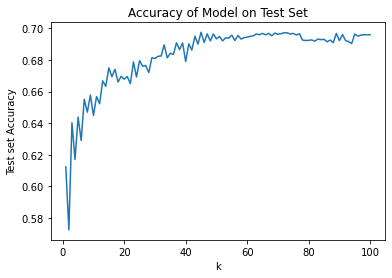

Best K for best accuracy is: 45


In [29]:
accuracies = []
k_list = list(range(1,101))

for k in range(1,101):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    accuracies.append(KNNmodel.score(X_test_scaled, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")

In [88]:
start_time = time.time()

KNNmodel = KNeighborsClassifier(n_neighbors = 45).fit(X_train_scaled, y_train)
KNN_predictions = KNNmodel.predict(X_test_scaled)

training_accuracy = KNNmodel.score(X_train_scaled, y_train)

print(classification_report(y_test, KNN_predictions))

end_time = time.time()

runtime =  end_time - start_time

print()

print(f"The runtime of K Nearest Neighbor model is: {round(runtime, 5)} seconds")
print()

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

              precision    recall  f1-score   support

           f       0.84      0.78      0.81      4259
           m       0.87      0.90      0.88      6671

    accuracy                           0.86     10930
   macro avg       0.85      0.84      0.85     10930
weighted avg       0.85      0.86      0.85     10930


The runtime of K Nearest Neighbor model is: 24.99098 seconds

The accuracy of model on training data is: 85.0%


#### Decision Tree Classifier

In [69]:
param_grid = {"max_depth": [8, 12, 18, 20, None],
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4}
Best score is 0.8833142857142857


In [89]:
start_time = time.time()

DTmodel = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 4)

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

end_time = time.time()

runtime =  end_time - start_time

print(f"The runtime of Decision Tree model is: {round(runtime, 5)} seconds")
print()

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

#print(DTmodel.get_depth())

              precision    recall  f1-score   support

           f       0.85      0.77      0.81      4259
           m       0.86      0.91      0.89      6671

    accuracy                           0.86     10930
   macro avg       0.85      0.84      0.85     10930
weighted avg       0.86      0.86      0.85     10930

The runtime of Decision Tree model is: 0.42322 seconds

The accuracy of model on training data is: 86.0%


#### SVM

In [94]:
start_time = time.time()

SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

end_time = time.time()

runtime =  end_time - start_time

print(f"The runtime of SVM model is: {round(runtime, 5)} seconds")
print()

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

              precision    recall  f1-score   support

           f       0.79      0.84      0.81      4259
           m       0.90      0.86      0.88      6671

    accuracy                           0.85     10930
   macro avg       0.84      0.85      0.85     10930
weighted avg       0.85      0.85      0.85     10930

The runtime of SVM model is: 31.79644 seconds

The accuracy of model on training data is: 86.0%


#### Logistic Regression

In [91]:
start_time = time.time()

logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))


end_time = time.time()

runtime =  end_time - start_time

print(f"The runtime of Logistic Regression model is: {round(runtime, 5)} seconds")
print()

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

              precision    recall  f1-score   support

           f       0.84      0.78      0.81      4259
           m       0.87      0.90      0.88      6671

    accuracy                           0.86     10930
   macro avg       0.85      0.84      0.85     10930
weighted avg       0.85      0.86      0.85     10930

The runtime of Logistic Regression model is: 0.65324 seconds

The accuracy of model on training data is: 86.0%


For this part I use 5 models: Multinomial Naive Bayes, K Nearest Neighbor, Decision Tree Classifier, Support Vector Machine and Logistic Regression.For all models I got a very good results. The accuracy of Four Models(SVM, Logistic Regression, Decision Tree and KNN) is almost 86%. Multinomial Naive Bayes accuracy(70%) is the lowest between these 5 models.

All the five algorithms have a very good accuracy and we can use age and body type to predict the sex of the user.

I also calculate the runtime of each model to find the fastest and the slowest one. Multinomial Naive Bayes is the fastest model with 0.34425 seconds runtime.The slowest model is Support Vector Machine with 31.79644 seconds. The runtime of these five models from the fastest to the slowest are as follows:

- Multinomial Naive Bayes: 0.34425 seconds  
- Decision Tree Classifier: 0.42322 seconds
- Logistic Regression: 0.65324 seconds
- K Nearest Neighbor: 24.99098 seconds
- Support Vector Machine: 31.79644 seconds


### Question 5: Can we predict sex of the user with education level and income?

In [95]:
#create copy of dataframe to do the changes only to a copy of data
df_copy5 = df

#replace -1 values with nan
df_copy5[df_copy5.income==-1]= np.nan

selected_features = ['sex', 'education', 'income']
df_copy5 = df_copy5[selected_features].dropna()

#convert 'education' into dummy variable
df_copy5 = pd.get_dummies(df_copy5, columns=['education'], prefix = ['education'])

print(df_copy5.shape)

df_copy5.head()

(10783, 33)


,sex,income,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
1,m,80000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,m,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,m,40000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,f,30000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,f,50000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
#Y is the target column, X has the features
X = df_copy5.iloc[:, 1:]
y = df_copy5['sex']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#scaler = StandardScaler()

scaler = MinMaxScaler()
 
# normalization
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

#### Mltinomial Naive Bayes

In [97]:
NBmodel = MultinomialNB()

NBmodel.fit(X_train_scaled, y_train)

training_accuracy = NBmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = NBmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 73.0%

              precision    recall  f1-score   support

           f       0.25      0.00      0.00       613
           m       0.72      1.00      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.48      0.50      0.42      2157
weighted avg       0.58      0.71      0.60      2157



#### KNN

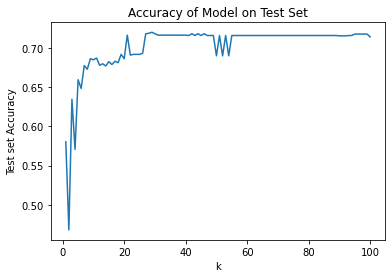

Best K for best accuracy is: 29


In [98]:
accuracies = []
k_list = list(range(1,101))

for k in range(1,101):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    accuracies.append(KNNmodel.score(X_test_scaled, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")

In [99]:
KNNmodel = KNeighborsClassifier(n_neighbors = 29)

KNNmodel.fit(X_train_scaled, y_train)

training_accuracy = KNNmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = KNNmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 73.0%

              precision    recall  f1-score   support

           f       0.57      0.07      0.12       613
           m       0.73      0.98      0.83      1544

    accuracy                           0.72      2157
   macro avg       0.65      0.52      0.48      2157
weighted avg       0.68      0.72      0.63      2157



#### Logistic Regression

In [100]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 73.0%

              precision    recall  f1-score   support

           f       0.33      0.00      0.00       613
           m       0.72      1.00      0.83      1544

    accuracy                           0.72      2157
   macro avg       0.52      0.50      0.42      2157
weighted avg       0.61      0.72      0.60      2157



#### Decision Tree Classifier

In [101]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

#print(DTmodel.get_depth())

The accuracy of model on training data is: 74.0%

              precision    recall  f1-score   support

           f       0.42      0.06      0.11       613
           m       0.72      0.97      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.57      0.51      0.47      2157
weighted avg       0.64      0.71      0.62      2157



#### Support Vector Machine

In [102]:
SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 73.0%

              precision    recall  f1-score   support

           f       0.25      0.00      0.00       613
           m       0.72      1.00      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.48      0.50      0.42      2157
weighted avg       0.58      0.71      0.60      2157



This time the accuracy of all five models is approximately 72% which is very promising. We conclude that we can predict sex of the user with education level and income.

### Question 6: Can we predict education level with essay text word counts?

Before finding the essay text word counts 'essay_len' and 'avg_word_len', we have to clean the text.For this purpose I write a cleanText method.

In [7]:
import string
from html.parser import HTMLParser

#<.*?>
#r'<[^>]+>'
TAG_RE = re.compile(r'<.*?>')
def remove_tags(dirty_string):
    return re.sub(TAG_RE, '', dirty_string)


def cleanText(dirty_text):
    #Removing URLs and Hashtags
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.\S+', "", dirty_text)
    # remove hashtags
    text = re.sub(r'#', '', text)
    # remove html tags from text
    text = remove_tags(text)
    # removing HTML characters
    text = HTMLParser().unescape(text)
    #remove punctuation marks from the text
    for c in string.punctuation:
        if c in text:
            text = text.replace(c, "")
    return text

In [8]:
all_data = df

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)

# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

#clean the dirty text from hyperlinks, punctuation and html tags
all_data["all_essays_cleaned_text"] = all_essays.apply(cleanText)

#compute the length of each essay and save them on a new column
all_data["essay_len"] = all_data["all_essays_cleaned_text"].apply(lambda x: len(x))

#count the number of words in each essay
all_data["word_count"] =  all_data["all_essays_cleaned_text"].apply(lambda x: len(x.split())) 

#compute the avrage length of each word
#all_data["avg_word_len"] = all_data['essay_len'] / all_data['word_count']

all_data["avg_word_len"] = all_data.apply(lambda row: 0 if row.word_count==0 else (row.essay_len/row.word_count), axis = 1)

#count the number of "i" or "me" occurances in the essay text of each user
all_data["i_or_me_count"] = all_data["all_essays_cleaned_text"].apply(lambda x: x.split().count('i') + x.split().count('me'))

In [9]:
#create copy of dataframe to do the changes only to a copy of data
df_copy6 = all_data

selected_features = ['education', 'word_count']

df_copy6 = df_copy6[selected_features].dropna()

print(df_copy6.shape)

df_copy6.head(10)

(53318, 2)


,education,word_count
0,working on college/university,450
1,working on space camp,265
2,graduated from masters program,856
3,working on college/university,66
4,graduated from college/university,101
5,graduated from college/university,411
6,graduated from college/university,337
7,graduated from college/university,176
8,graduated from college/university,354
9,working on two-year college,400


In [10]:
#Y is the response variable, X is the predictor variable
X = df_copy6[['word_count']]
y = df_copy6['education']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler()
#normalization
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

#### LogisticRegression

In [11]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 45.0%

                                   precision    recall  f1-score   support

               college/university       0.00      0.00      0.00       173
dropped out of college/university       1.00      0.01      0.01       181
       dropped out of high school       0.00      0.00      0.00        20
        dropped out of law school       0.00      0.00      0.00         1
   dropped out of masters program       0.00      0.00      0.00        34
        dropped out of med school       0.00      0.00      0.00         2
      dropped out of ph.d program       0.00      0.00      0.00        20
        dropped out of space camp       0.00      0.00      0.00        98
  dropped out of two-year college       0.00      0.00      0.00        27
graduated from college/university       0.45      1.00      0.62      4776
       graduated from high school       0.00      0.00      0.00       310
        graduated from law school       0.00     

#### SVC

In [13]:
SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 45.0%

                                   precision    recall  f1-score   support

               college/university       0.00      0.00      0.00       173
dropped out of college/university       0.00      0.00      0.00       181
       dropped out of high school       0.00      0.00      0.00        20
        dropped out of law school       0.00      0.00      0.00         1
   dropped out of masters program       0.00      0.00      0.00        34
        dropped out of med school       0.00      0.00      0.00         2
      dropped out of ph.d program       0.00      0.00      0.00        20
        dropped out of space camp       0.00      0.00      0.00        98
  dropped out of two-year college       0.00      0.00      0.00        27
graduated from college/university       0.45      1.00      0.62      4776
       graduated from high school       0.00      0.00      0.00       310
        graduated from law school       0.00     

#### Decision Tree Classifier

In [14]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))


The accuracy of model on training data is: 46.0%

                                   precision    recall  f1-score   support

               college/university       0.00      0.00      0.00       173
dropped out of college/university       0.03      0.01      0.01       181
       dropped out of high school       0.00      0.00      0.00        20
        dropped out of law school       0.00      0.00      0.00         1
   dropped out of masters program       0.00      0.00      0.00        34
        dropped out of med school       0.00      0.00      0.00         2
      dropped out of ph.d program       0.00      0.00      0.00        20
        dropped out of space camp       0.00      0.00      0.00        98
  dropped out of two-year college       0.00      0.00      0.00        27
graduated from college/university       0.45      0.98      0.62      4776
       graduated from high school       0.00      0.00      0.00       310
        graduated from law school       0.00     

By using classification techniques, we get low accuracy(under 45%). So we cannot use essay text word count to predict education level.

### Question 7: Can we predict income with length of essays and average word length?

Use Regression Techniques: Multiple Linear Regression 

In [111]:
#create copy of dataframe to do the changes only to a copy of data
df_copy7 = all_data

selected_features = ['income', 'essay_len', 'avg_word_len']

df_copy7[df_copy7.income==-1]= np.nan

df_copy7 = df_copy7[selected_features].dropna()


print(df_copy7.shape)

df_copy7.head(10)

(11504, 3)


,income,essay_len,avg_word_len
1,80000.0,1340.0,5.056604
3,20000.0,426.0,6.454545
11,40000.0,4306.0,5.322621
13,30000.0,9.0,0.000000
14,50000.0,2360.0,5.425287
43,60000.0,6309.0,5.573322
48,1000000.0,3561.0,5.564063
66,20000.0,358.0,5.682540
72,150000.0,2350.0,6.250000
73,50000.0,2449.0,5.803318


In [112]:
#Y is the response variable, X has the predictor variables
X = df_copy7[['essay_len', 'avg_word_len']]
y = df_copy7['income']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler()
#normalization
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [113]:
# creating a regression model
mlr = LinearRegression()

# fitting the model with training data
mlr.fit(X_train_scaled,y_train)

print(f"coeficient for linear regression model is: {mlr.coef_}")
print(f"intercept for our model is: {mlr.intercept_}")

predictions = mlr.predict(X_test_scaled)

print()
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print()

r_squared = mlr.score(X_test_scaled, y_test)

print(f"R2 value of our model is: {r_squared}")

#df_copy7.income.describe()

coeficient for linear regression model is: [-2804.07693643  7212.31294077]
intercept for our model is: 104476.80104313811

mean_squared_error :  39831010759.83482
mean_absolute_error :  91817.70266256887

R2 value of our model is: 0.000778104015553116


R-squared is the proportion of the variance in the response variable that can be explained by the predictor variables in a linear regression model.In our example R2 is very low(0.00078), so we can conclude that we cannot explain income(response variable) with length of essays and average word length(predictor variables).The mean_squared_error is very large too and this is another sign that this model does not perform good.



### Question 8: Predict age with the frequency of “I” or “me” in essays?

Use Regression Techniques



#### Linear Regression Model

In [15]:
#create copy of dataframe to do the changes only to a copy of data
df_copy8 = all_data

selected_features = ['age', 'i_or_me_count']

df_copy8 = df_copy8[selected_features].dropna()


print(df_copy8.shape)

df_copy8.head(10)

(59946, 2)


,age,i_or_me_count
0,22,20
1,35,22
2,38,24
3,23,2
4,29,2
5,29,27
6,32,7
7,31,3
8,24,11
9,37,28


In [16]:
#Y is the response variable, X is predictor variable
X = df_copy8[['i_or_me_count']]
y = df_copy8['age']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler()
#normalization
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
start_time = time.time()

# creating a regression model
lr_model = LinearRegression()

# fitting the model with training data
lr_model.fit(X_train_scaled,y_train)

predictions = lr_model.predict(X_test_scaled)

end_time = time.time()

runtime =  end_time - start_time

print(f"coeficient for linear regression model is: {lr_model.coef_}")
print(f"intercept for our model is: {lr_model.intercept_}")

print()
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print()

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"RMSE of linear regression model is: {rmse}")
print()
r_squared = lr_model.score(X_test_scaled, y_test)

print(f"R2 value of our model is: {r_squared}")
print()

print(f"The runtime of linear regression model is: {round(runtime, 5)} seconds")

coeficient for linear regression model is: [0.5727514]
intercept for our model is: 32.35130119276003

mean_squared_error :  87.16646053154385
mean_absolute_error :  7.160277076802092

RMSE of linear regression model is: 9.336298010000744

R2 value of our model is: 0.004232094036801692

The runtime of linear regression model is: 0.00398 seconds


We get a very low R2 value(0.00423).we can conclude that we cannot explain age(response variable) with number of “I” or “me” in essays(predictor variable). This linear model cannot predict age of the user based on frequency of “I” or “me” in his/her essays. The RMSE of the model is 9.34 years which is high and not acceptable.

#### KNeighbors Regressor

In [19]:
from sklearn.neighbors import KNeighborsRegressor

gridsearch = GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors':list(range(1, 100)),
                         'weights': ['uniform', 'distance']})
gridsearch.fit(X_train_scaled, y_train)

print(gridsearch.best_params_)

{'n_neighbors': 96, 'weights': 'uniform'}


In [24]:
start_time = time.time()

knn_model = KNeighborsRegressor(n_neighbors= 96, weights = 'uniform')

knn_model.fit(X_train_scaled, y_train)

predictions = knn_model.predict(X_test_scaled)

end_time = time.time()

runtime =  end_time - start_time

print()
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print()

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"RMSE of knn model is: {rmse}")

r_squared = knn_model.score(X_test_scaled, y_test)

print(f"R2 value of our model is: {r_squared}")
print()

print(f"The runtime of KNeighbors Regressor model is: {round(runtime, 5)} seconds")


mean_squared_error :  88.18806428136006
mean_absolute_error :  7.15697021823742

RMSE of knn model is: 9.390850029755564
R2 value of our model is: -0.007438452415069907

The runtime of KNeighbors Regressor model is: 0.46192 seconds


We get negative R2 value(-0.00127). R2  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line. KNN Regressor cannot predict age of the user based on frequency of “I” or “me” in his/her essays. The RMSE of the model is 9.39 years which is high and not acceptable.

By comparing these two regression models, we can see that linear regression is faster than KNN regressor and its R2 value is bigger too. Linear regression model outperforms KNeighborsRegressor a little.

## Conclusion

- Most of the users are between 25 to 35 years old.
- There are more male users than female users.
- Males are taller than females.
- We cannot predict Zodiac signs using 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' and 'drugs_code' features.
- We cannot predict body type by using lifestyle information ('diet', 'smokes_code', 'drinks_code', 'drugs_code'), sex and age.
- We can not predict the income of the user by making models based on his job, sex and education.
- An accurate model can be built to predict the gender of an user based on their age and body type. I got 86% accuracy with SVM, Logistic Regression, Decision Tree and KNN models.
- We can build good models with high accuracy(72%) to predict sex of an user with education level and income.
- We cannot use essay text word count to predict education level.
- we cannot predict income with length of essays and average word length.
- We cannot predict age with the frequency of “I” or “me” in essays.